## Statistical comparison between the outputs for each model


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

import pickle
import itertools

Here we are opening the iou metrics that have been saved.

In [3]:
with open('iou_metric_test_results.pkl', 'rb') as file:
      
    model_metrics = pickle.load(file)
  

In [4]:
models = list(model_metrics.keys())
iou_info = list(model_metrics[models[0]].keys())
areas_of_interest = list(model_metrics[models[0]][iou_info[0]].keys())

In [5]:
models

['efficient_model_1',
 'efficient_model_2',
 'model_1',
 'model_2',
 'res_model_1',
 'res_model_2',
 'attention_model_1',
 'attention_model_2']

In [6]:
iou_info

['road_iou',
 'building_iou',
 'road_file',
 'road_index',
 'building_file',
 'building_index']

In [7]:
areas_of_interest

['AOI_2_Vegas', 'AOI_3_Paris', 'AOI_4_Shanghai', 'AOI_5_Khartoum']

In [8]:
pairs = list(itertools.product(models, models))
for p in pairs:
    p2 = (p[1], p[0])
    if p2 in pairs:
        pairs.remove(p)

In [9]:
print(len(pairs))

38


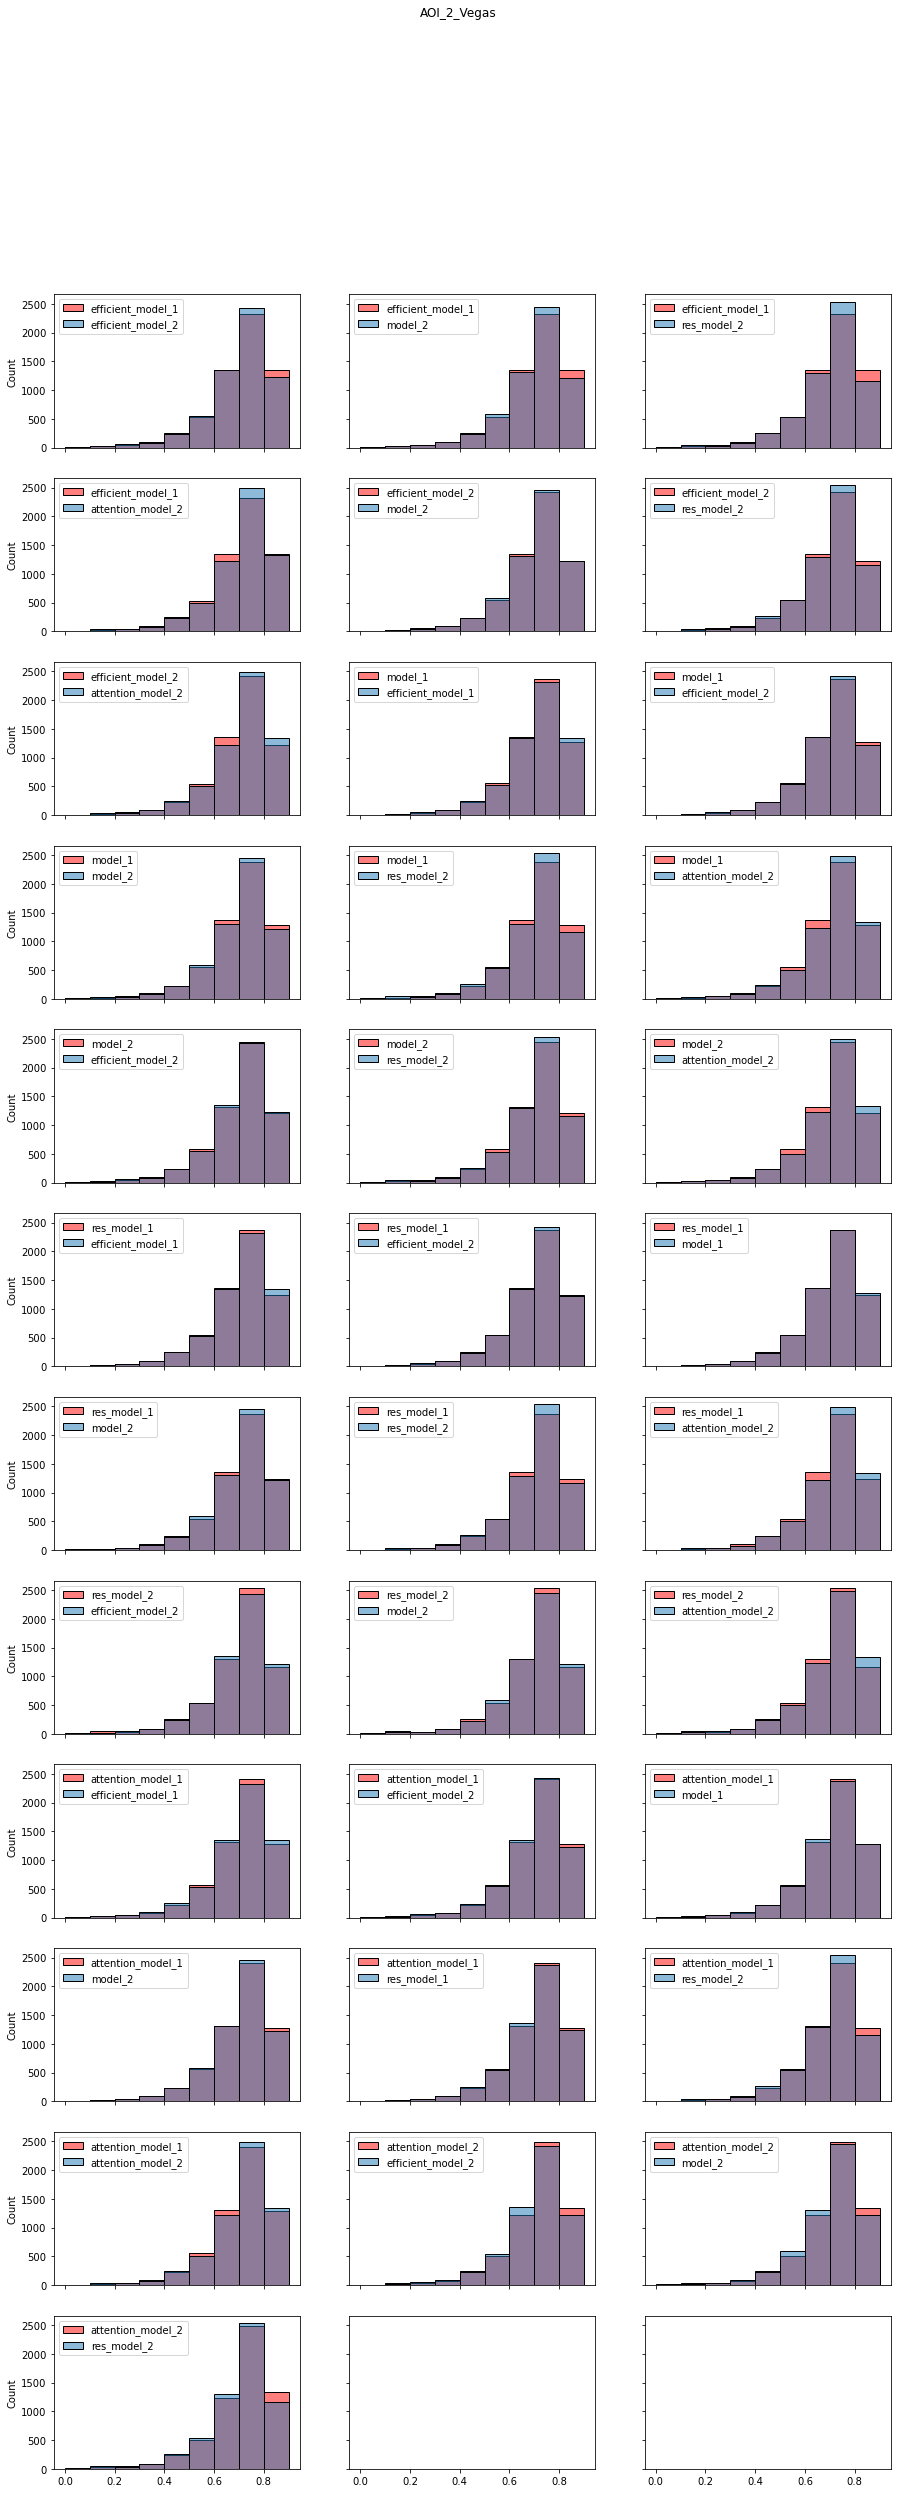

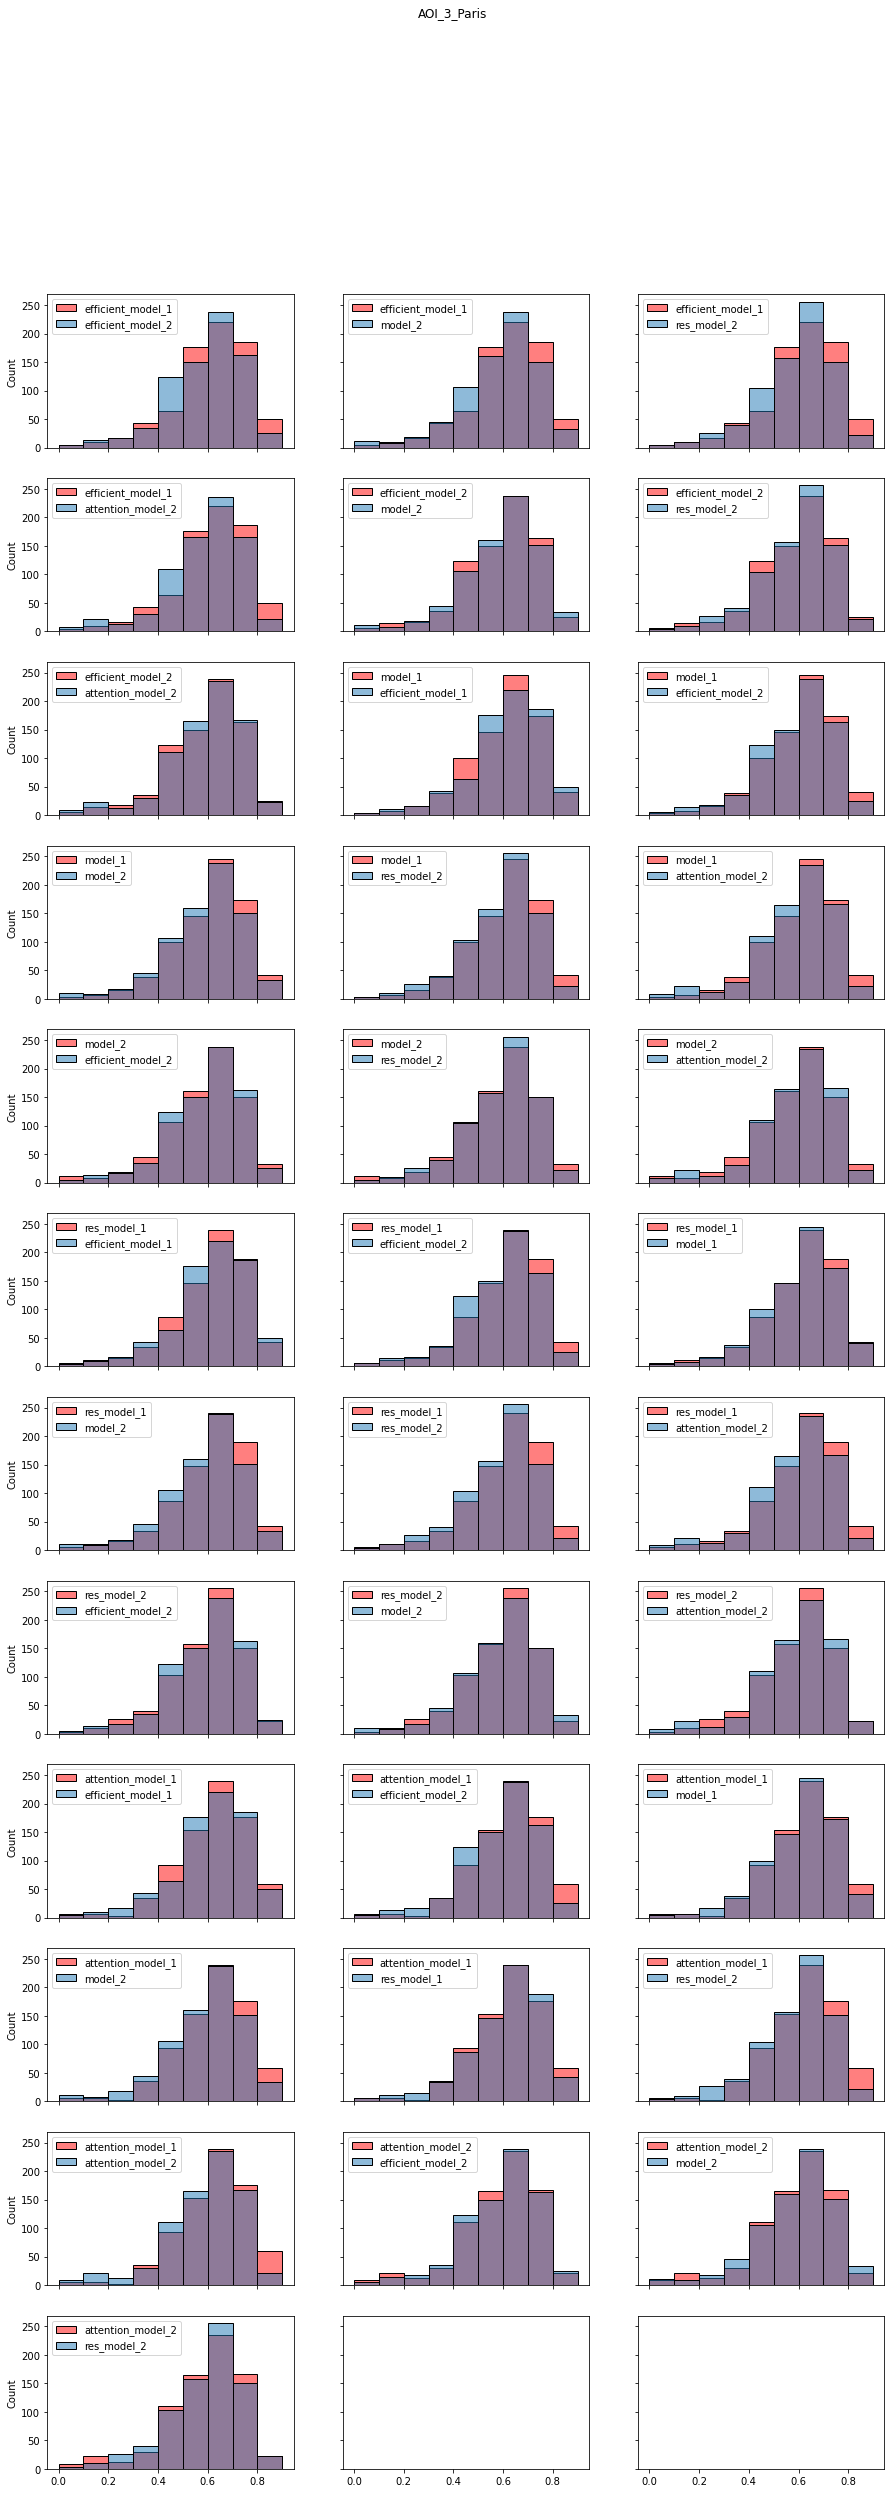

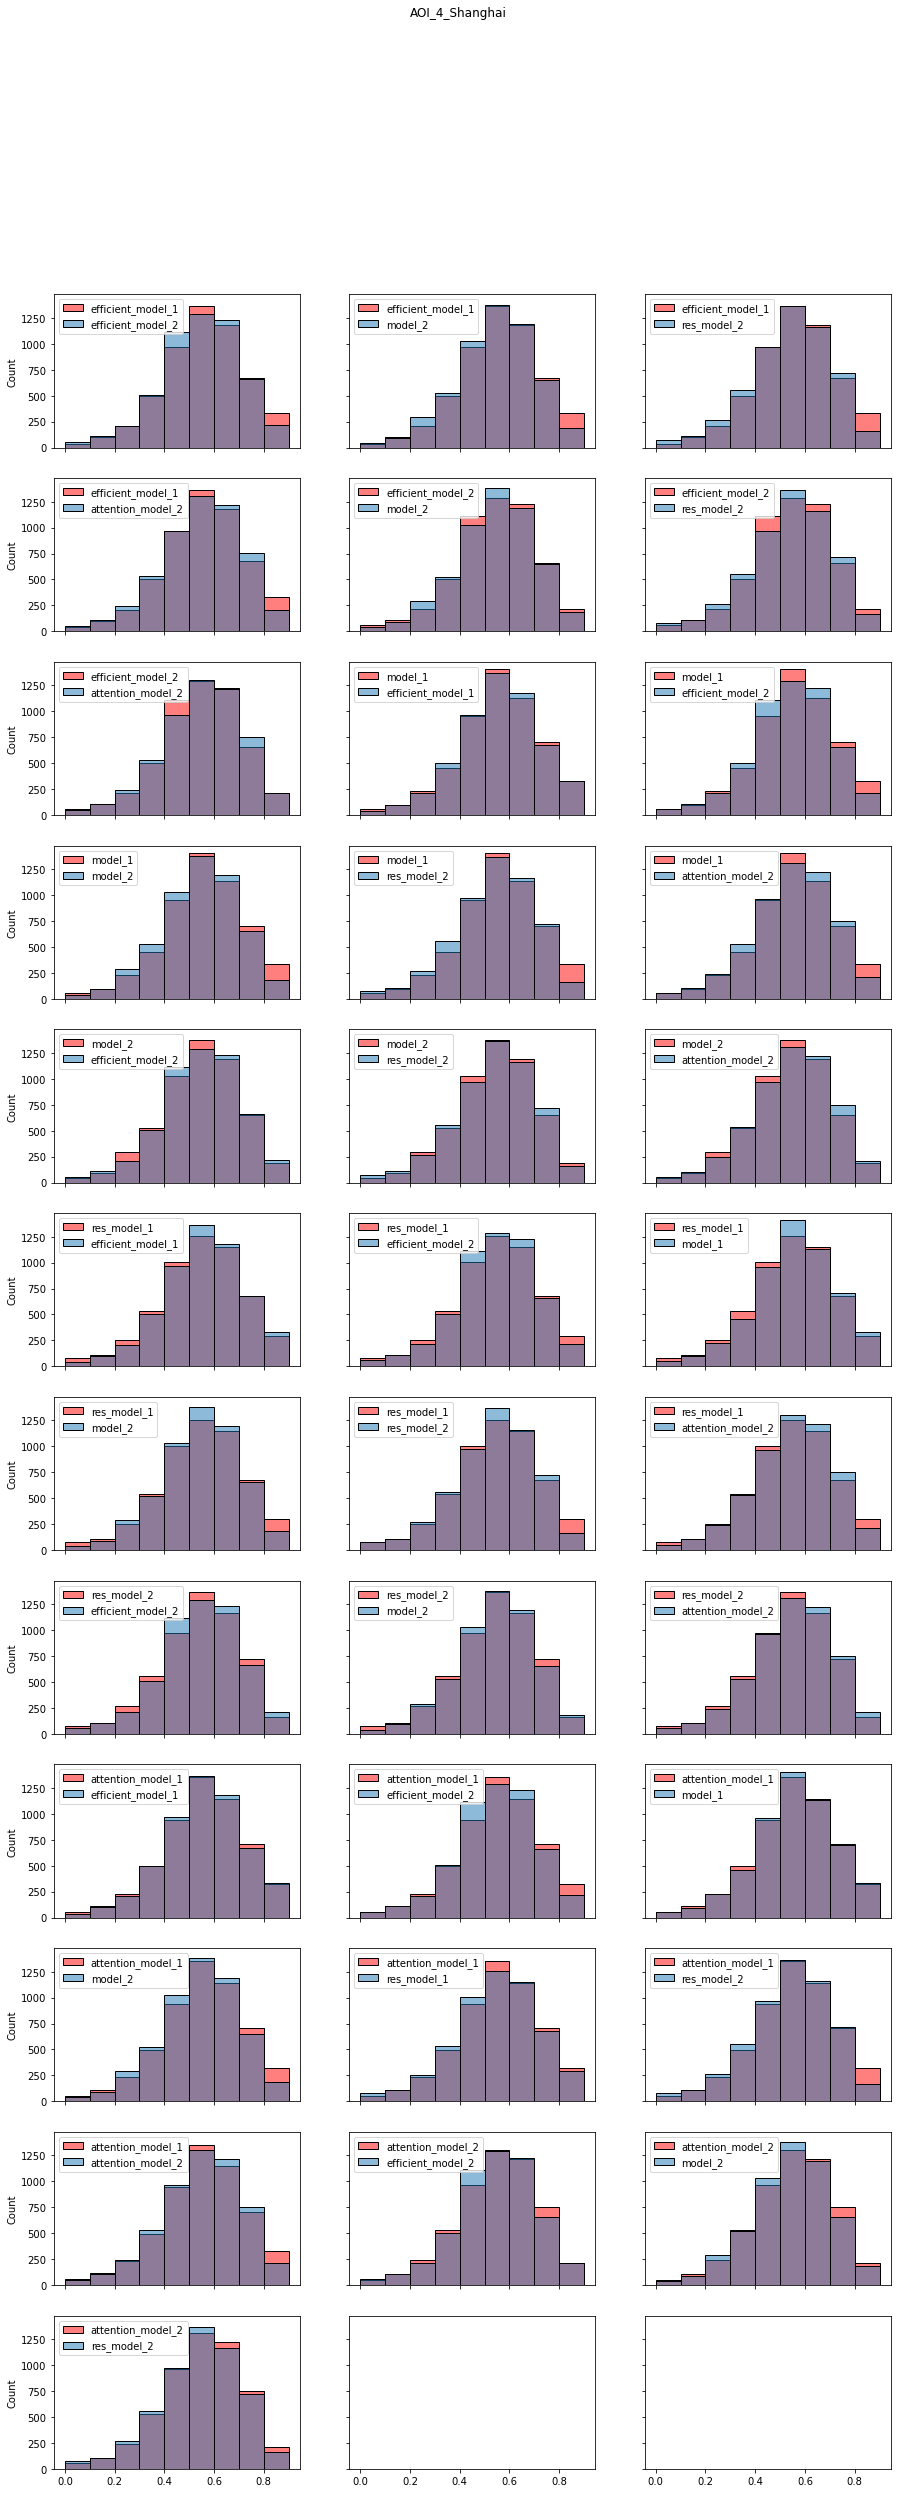

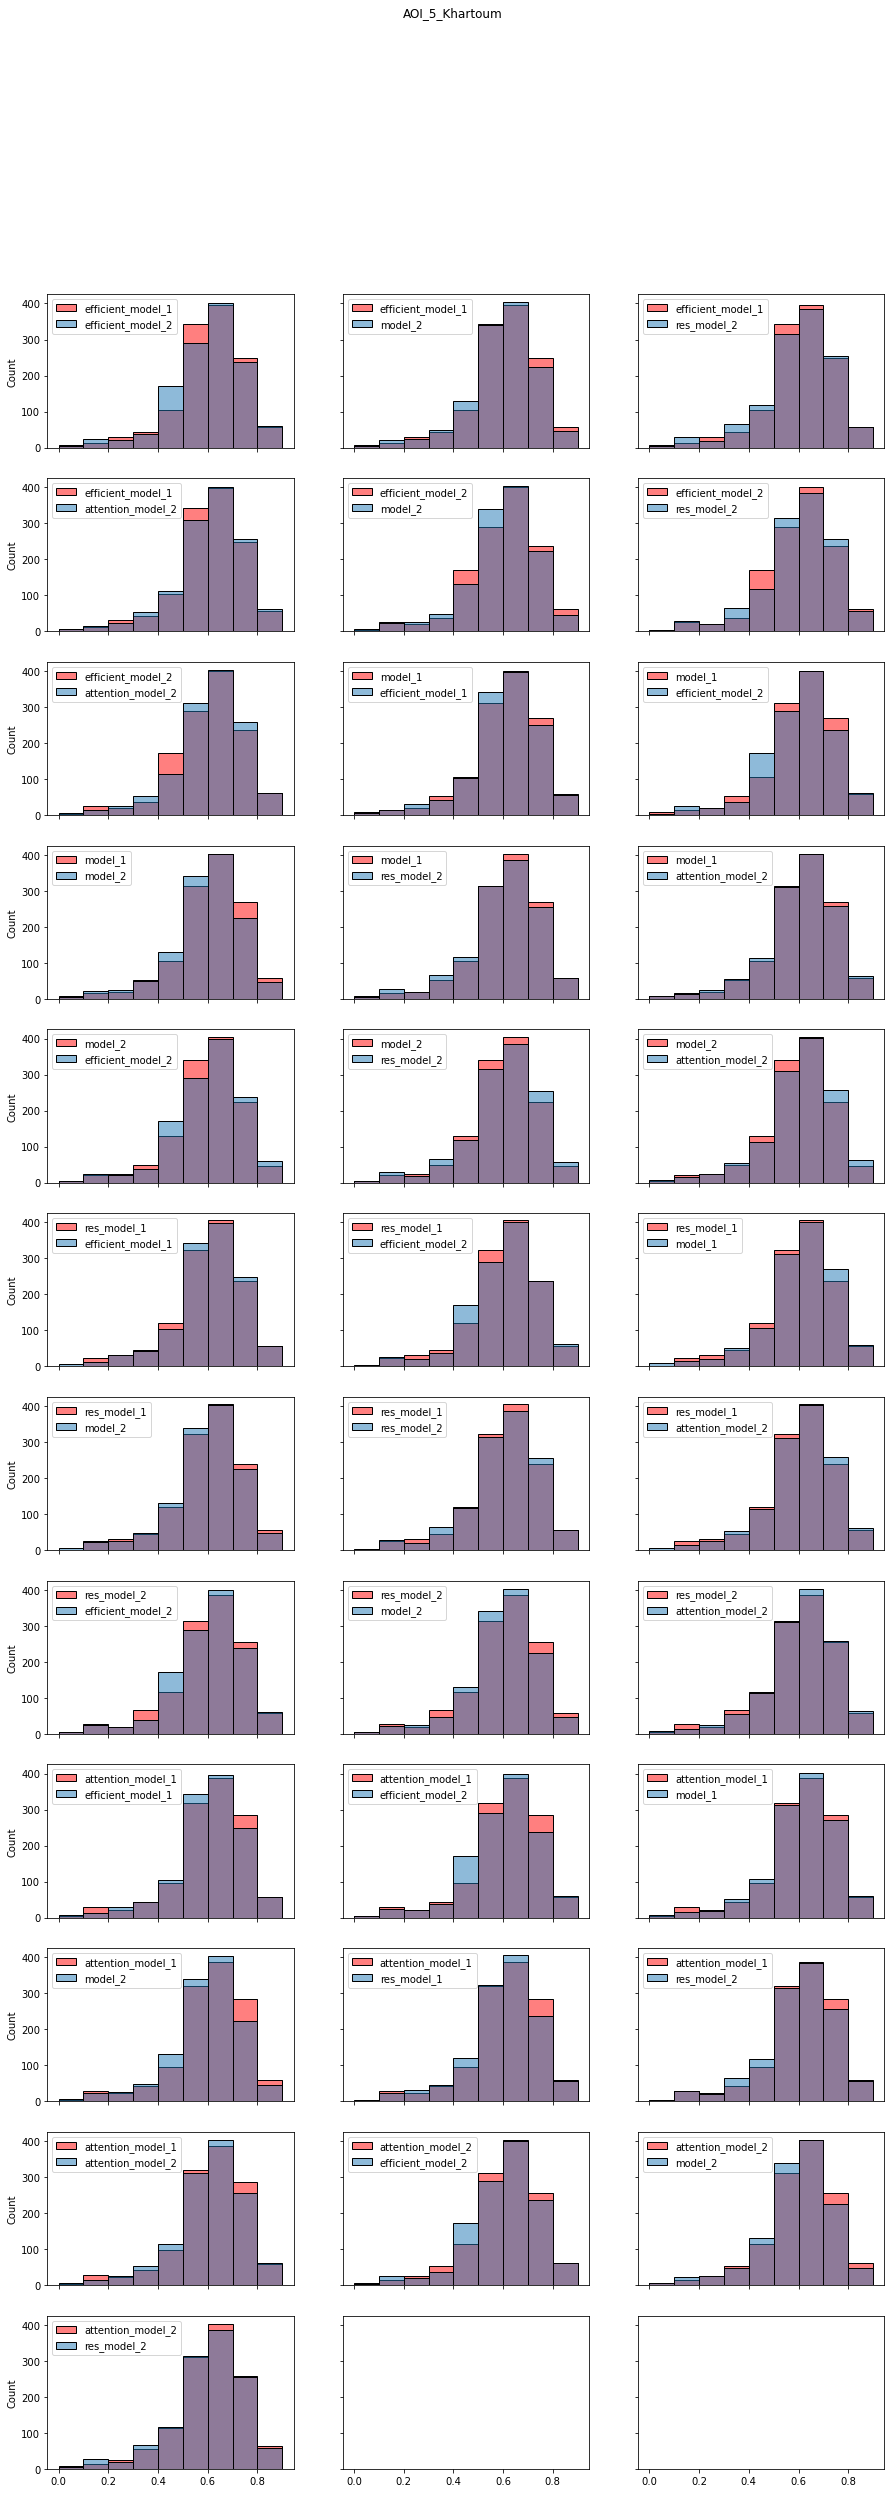

In [138]:
p_values_dict = {}
for area in areas_of_interest:
    p_values_dict[area] = pd.DataFrame(index=models, columns=models)
    fig, axs = plt.subplots(nrows=12,ncols=3,sharex=True, sharey=True, figsize=(3 * 5, 8 * 5))
    axs = np.ravel(axs)
    fig.suptitle(area)
    count = 0
    for m1, m2 in pairs:
        if m1 != m2:
            ax = axs[count]
            sns.histplot(x=model_metrics[m1]['road_iou'][area], bins=np.arange(0, 1, 0.1), label=f'{m1}', ax=ax, color='red', alpha=0.5)
            sns.histplot(x=model_metrics[m2]['road_iou'][area], bins=np.arange(0, 1, 0.1), label=f'{m2}', ax=ax, alpha=0.5)
            ax.legend(loc="upper left")
            _, p_val = stats.ttest_ind(model_metrics[m1]['road_iou'][area], model_metrics[m2]['road_iou'][area], alternative ='greater')
            p_values_dict[area].loc[m1, m2] = p_val
            #print(f'[{area}] The for {m1} > {m2} p-value is {p_val: 0.5f}')
            count += 1

In [13]:
for key in p_values_dict.keys():
    print(key)
    display(p_values_dict[key])

AOI_2_Vegas


,efficient_model_1,efficient_model_2,model_1,model_2,res_model_1,res_model_2,attention_model_1,attention_model_2
efficient_model_1,NaN,0.141697,NaN,0.13067,NaN,0.066622,NaN,0.92509
efficient_model_2,NaN,NaN,NaN,0.479476,NaN,0.329042,NaN,0.994271
model_1,0.560006,0.175373,NaN,0.162483,NaN,0.085648,NaN,0.946145
model_2,NaN,0.520524,NaN,NaN,NaN,0.347762,NaN,0.995036
res_model_1,0.712905,0.304484,0.661566,0.286859,NaN,0.171633,NaN,0.977842
res_model_2,NaN,0.670958,NaN,0.652238,NaN,NaN,NaN,0.998382
attention_model_1,0.236838,0.035598,0.190172,0.031815,0.099103,0.0129,NaN,0.768303
attention_model_2,NaN,0.005729,NaN,0.004964,NaN,0.001618,NaN,NaN


AOI_3_Paris


,efficient_model_1,efficient_model_2,model_1,model_2,res_model_1,res_model_2,attention_model_1,attention_model_2
efficient_model_1,NaN,0.001766,NaN,0.000783,NaN,0.001509,NaN,0.001115
efficient_model_2,NaN,NaN,NaN,0.3797,NaN,0.492688,NaN,0.427251
model_1,0.769037,0.012082,NaN,0.005892,NaN,0.010778,NaN,0.008028
model_2,NaN,0.6203,NaN,NaN,NaN,0.614639,NaN,0.548675
res_model_1,0.458217,0.001214,0.198793,0.000527,NaN,0.001026,NaN,0.000758
res_model_2,NaN,0.507312,NaN,0.385361,NaN,NaN,NaN,0.433606
attention_model_1,0.161681,0.000032,0.038085,0.000012,0.188601,0.000025,NaN,0.000019
attention_model_2,NaN,0.572749,NaN,0.451325,NaN,0.566394,NaN,NaN


AOI_4_Shanghai


,efficient_model_1,efficient_model_2,model_1,model_2,res_model_1,res_model_2,attention_model_1,attention_model_2
efficient_model_1,NaN,0.000004,NaN,0.0,NaN,0.0,NaN,0.000942
efficient_model_2,NaN,NaN,NaN,0.16353,NaN,0.035989,NaN,0.907421
model_1,0.620056,0.00002,NaN,0.0,NaN,0.0,NaN,0.002696
model_2,NaN,0.83647,NaN,NaN,NaN,0.201206,NaN,0.989319
res_model_1,0.999405,0.146544,0.998283,0.022963,NaN,0.002805,NaN,0.591086
res_model_2,NaN,0.964011,NaN,0.798794,NaN,NaN,NaN,0.999013
attention_model_1,0.845697,0.000373,0.761064,0.000007,0.01324,0.0,NaN,0.019983
attention_model_2,NaN,0.092579,NaN,0.010681,NaN,0.000987,NaN,NaN


AOI_5_Khartoum


,efficient_model_1,efficient_model_2,model_1,model_2,res_model_1,res_model_2,attention_model_1,attention_model_2
efficient_model_1,NaN,0.143251,NaN,0.037608,NaN,0.121217,NaN,0.528822
efficient_model_2,NaN,NaN,NaN,0.243131,NaN,0.455149,NaN,0.870442
model_1,0.232173,0.0373,NaN,0.006244,NaN,0.030175,NaN,0.256671
model_2,NaN,0.756869,NaN,NaN,NaN,0.717599,NaN,0.966843
res_model_1,0.662195,0.257707,0.874195,0.087069,NaN,0.224346,NaN,0.686907
res_model_2,NaN,0.544851,NaN,0.282401,NaN,NaN,NaN,0.890691
attention_model_1,0.184501,0.026478,0.430704,0.004109,0.095474,0.02127,NaN,0.206135
attention_model_2,NaN,0.129558,NaN,0.033157,NaN,0.109309,NaN,NaN


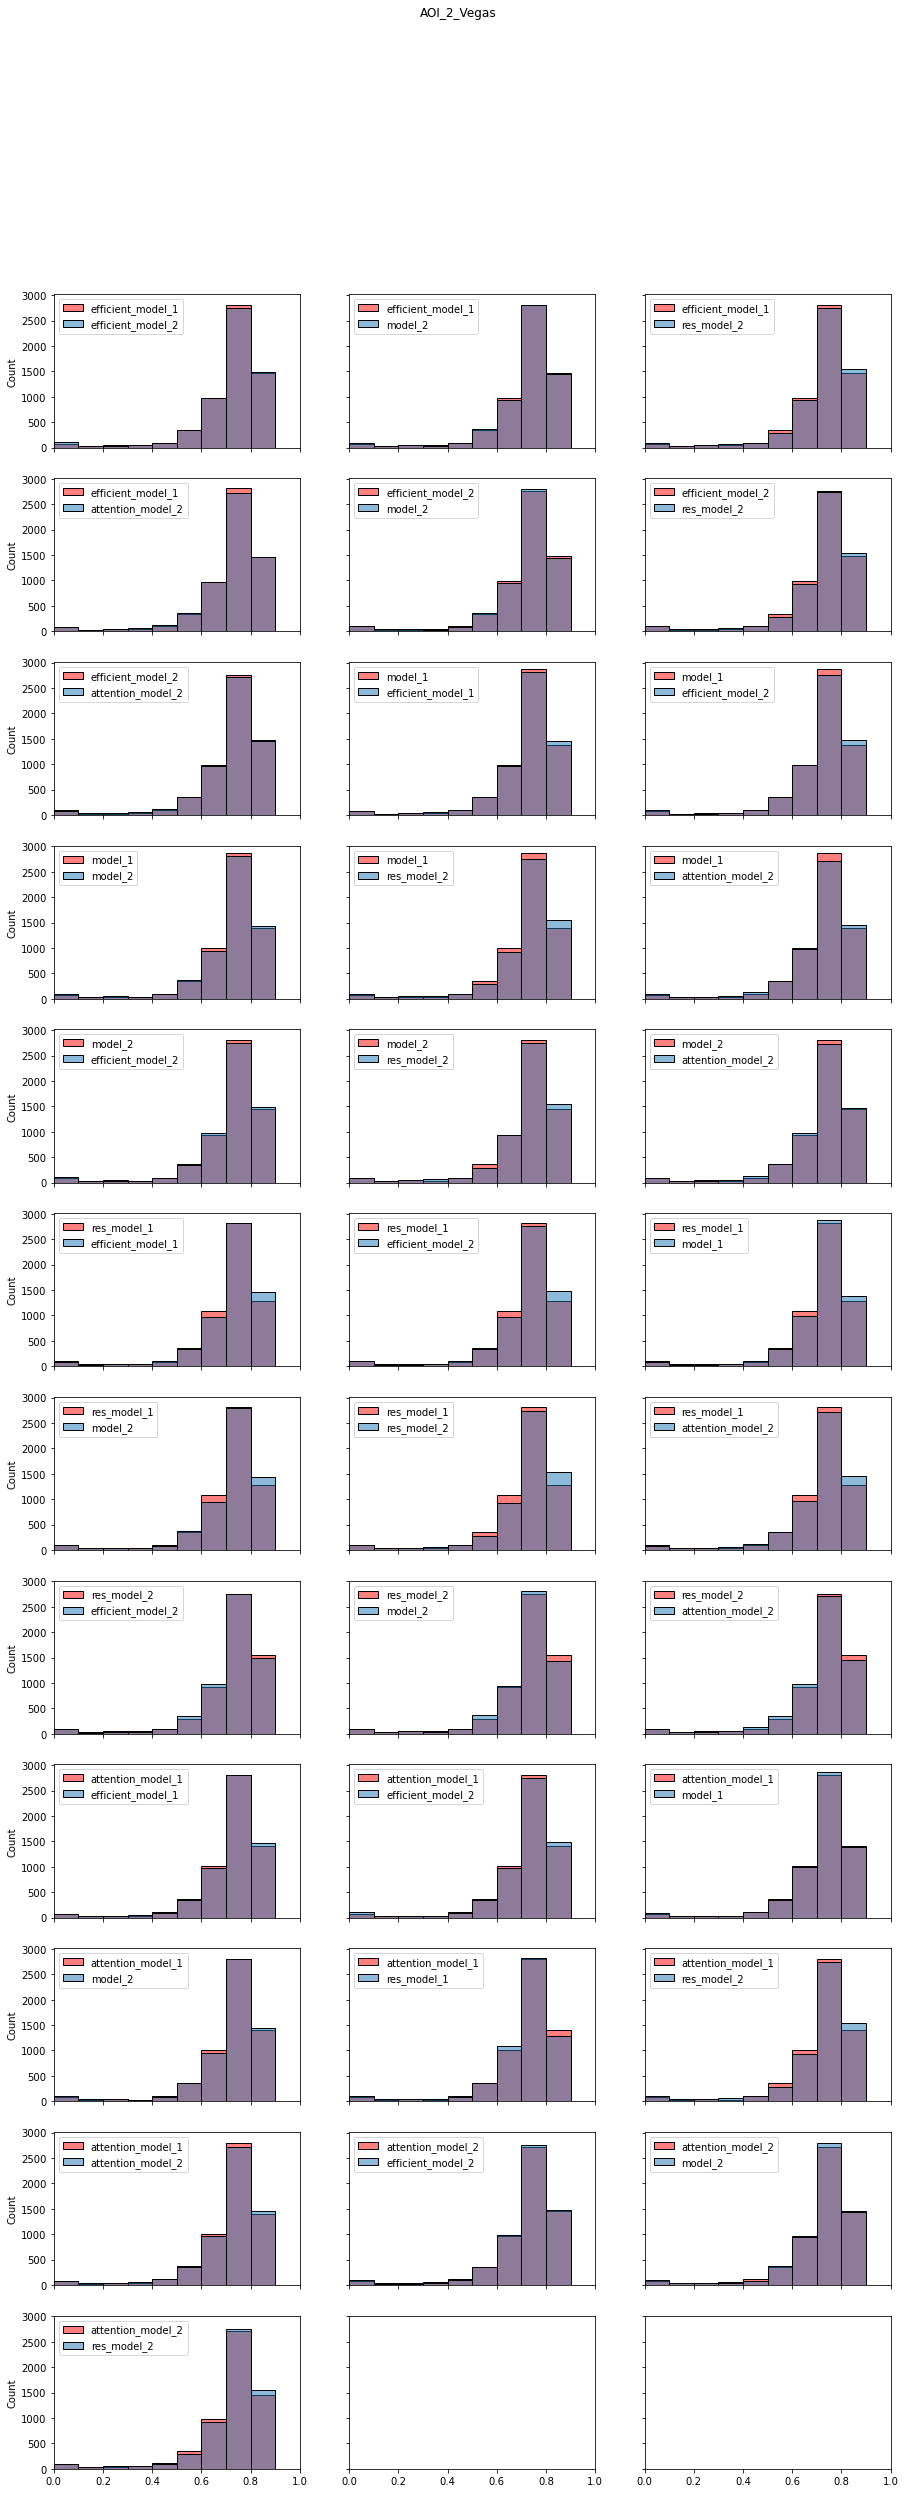

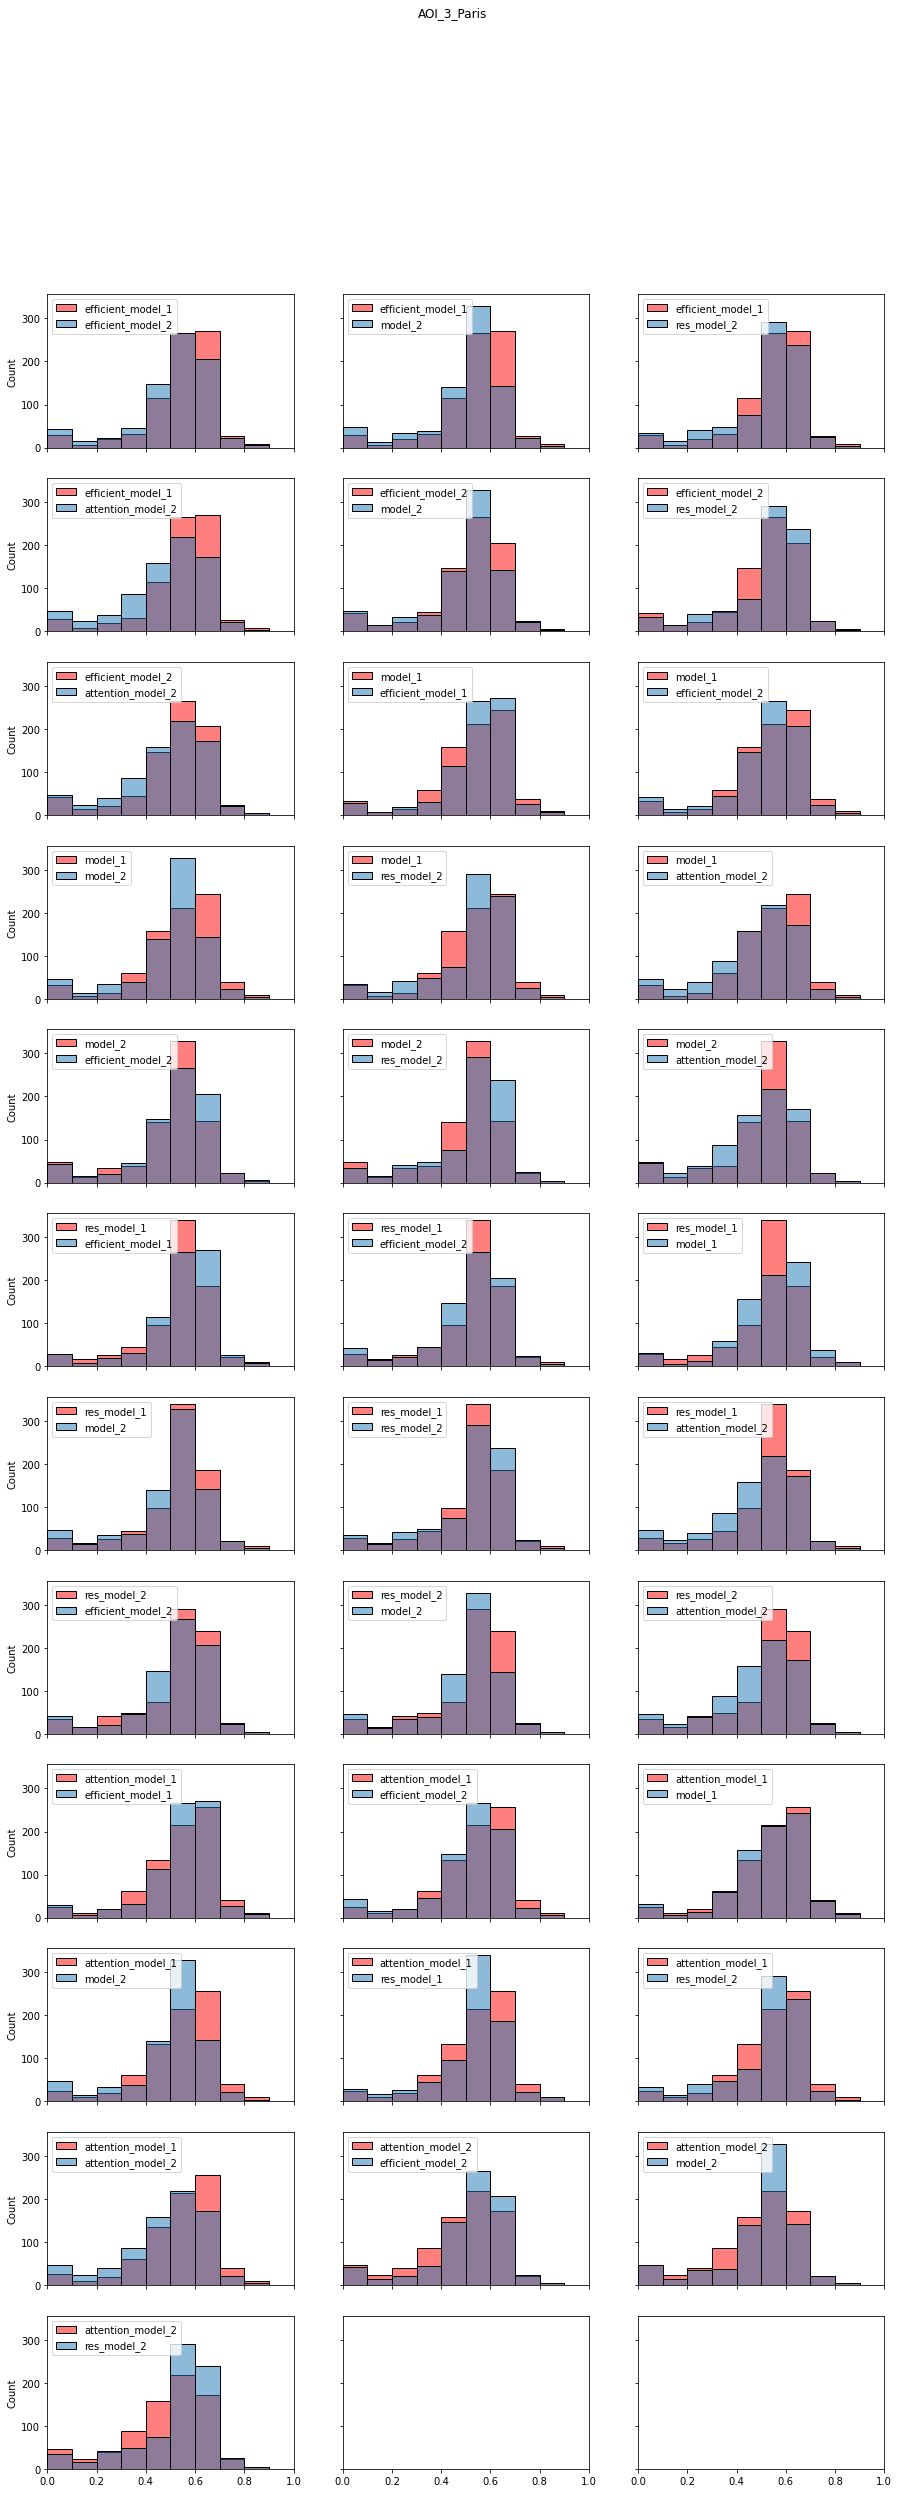

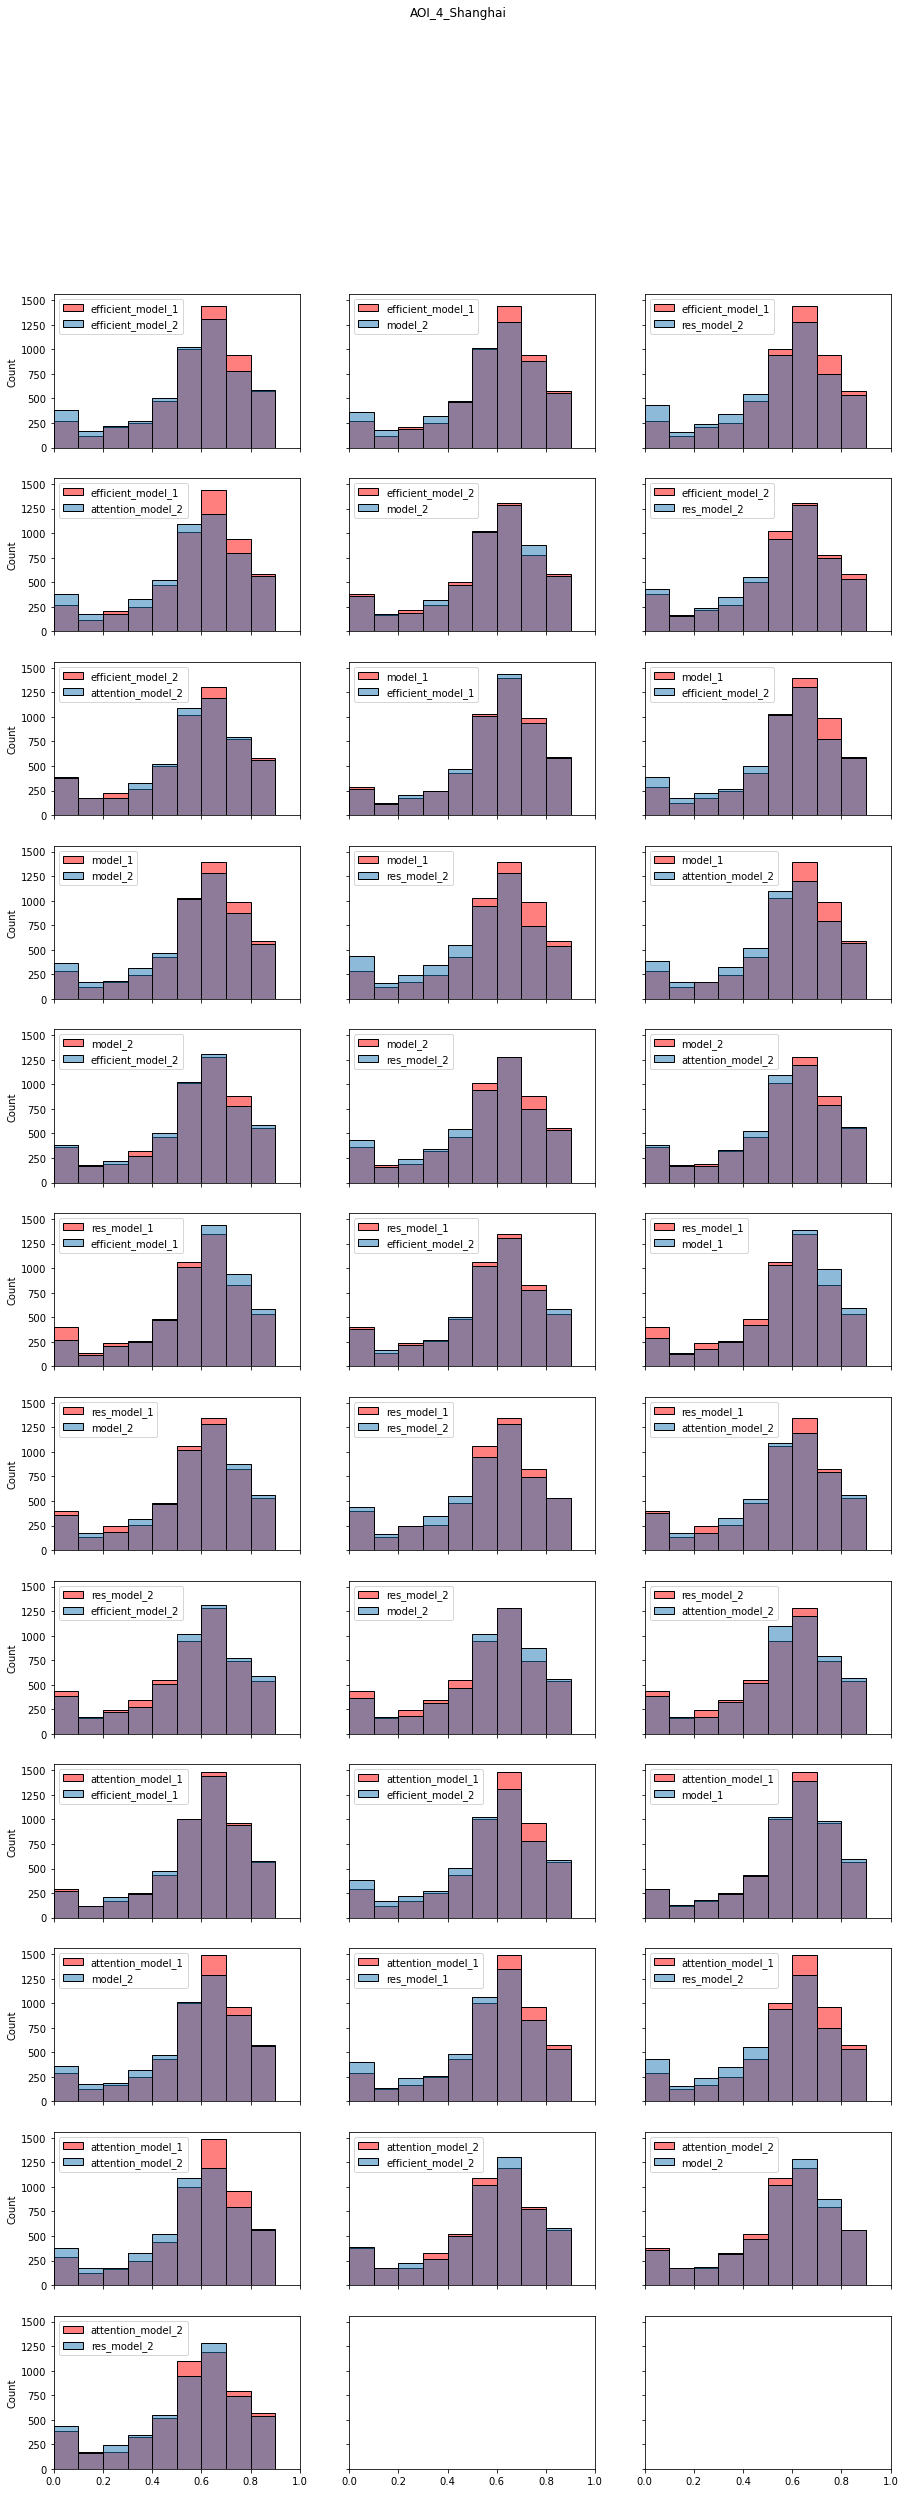

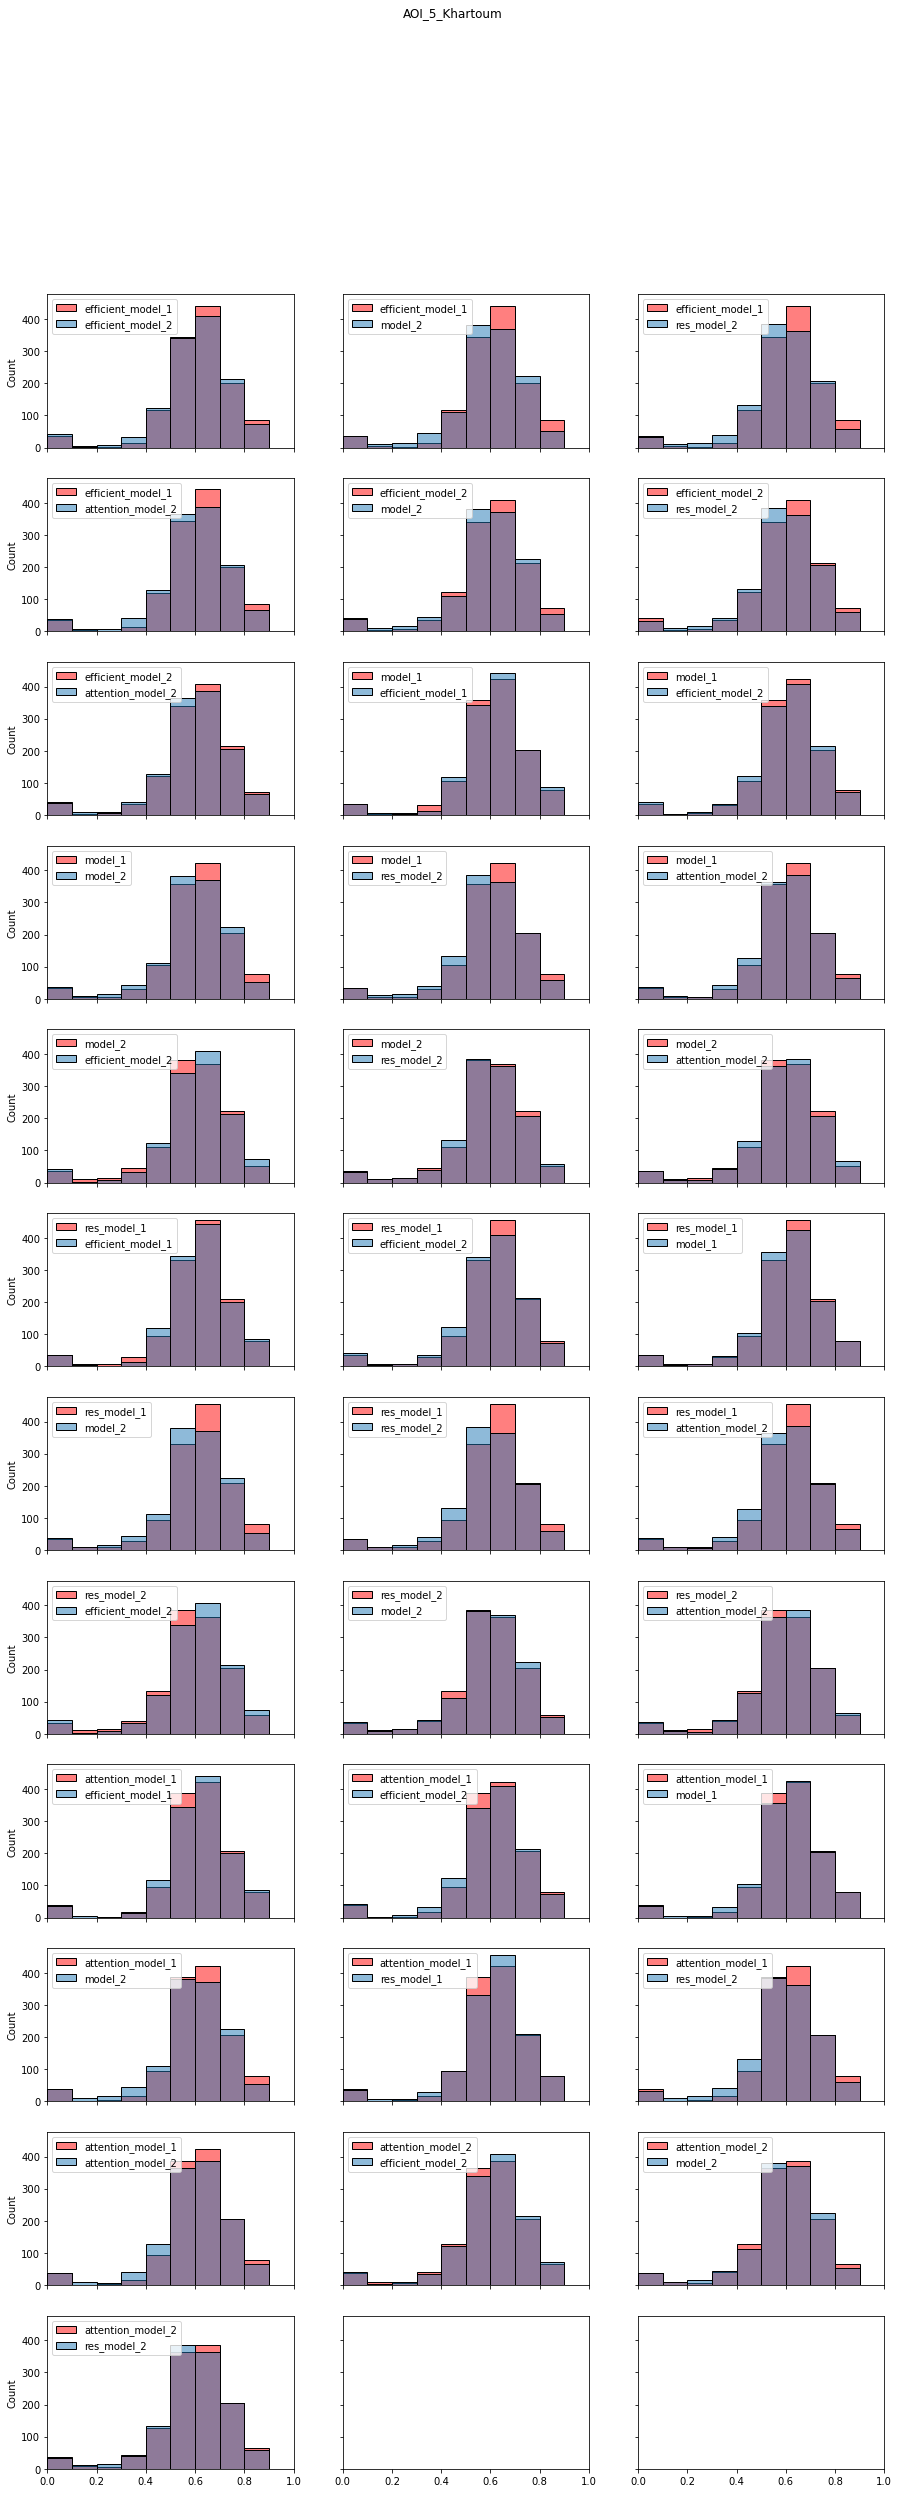

In [141]:
p_values_dict = {}
for area in areas_of_interest:
    p_values_dict[area] = pd.DataFrame(index=models, columns=models)
    fig, axs = plt.subplots(nrows=12,ncols=3,sharex=True, sharey=True, figsize=(3 * 5, 8 * 5))
    axs = np.ravel(axs)
    fig.suptitle(area)
    count = 0
    for m1, m2 in pairs:
        if m1 != m2:
            ax = axs[count]
            sns.histplot(x=model_metrics[m1]['building_iou'][area], bins=np.arange(0, 1, 0.1), label=f'{m1}', ax=ax, color='red', alpha=0.5)
            sns.histplot(x=model_metrics[m2]['building_iou'][area], bins=np.arange(0, 1, 0.1), label=f'{m2}', ax=ax, alpha=0.5)
            ax.set_xlim([0,1])
            ax.legend(loc="upper left")
            _, p_val = stats.ttest_ind(model_metrics[m1]['building_iou'][area], model_metrics[m2]['building_iou'][area], alternative ='greater')
            p_values_dict[area].loc[m1, m2] = p_val
            #print(f'[{area}] The for {m1} > {m2} p-value is {p_val: 0.5f}')
            count += 1

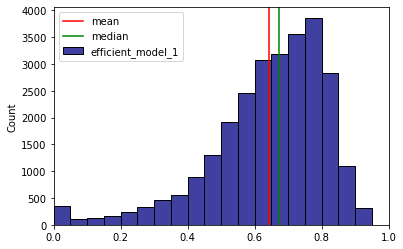

efficient_model_1 has a mean IoU of 0.642
efficient_model_1 has a median IoU of 0.673


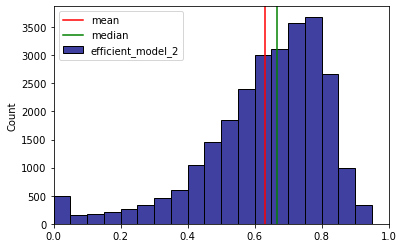

efficient_model_2 has a mean IoU of 0.631
efficient_model_2 has a median IoU of 0.666


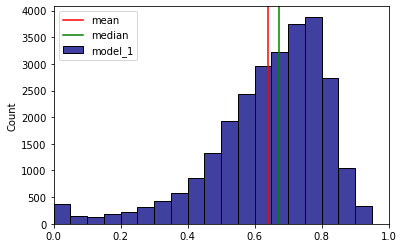

model_1 has a mean IoU of 0.641
model_1 has a median IoU of 0.674


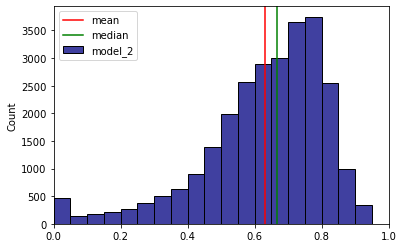

model_2 has a mean IoU of 0.630
model_2 has a median IoU of 0.666


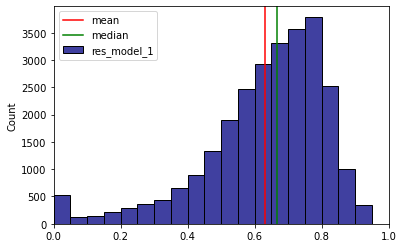

res_model_1 has a mean IoU of 0.632
res_model_1 has a median IoU of 0.668


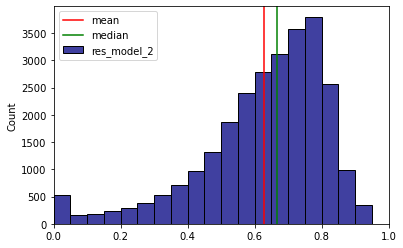

res_model_2 has a mean IoU of 0.627
res_model_2 has a median IoU of 0.666


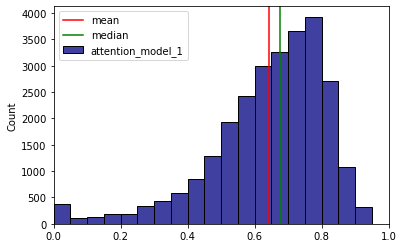

attention_model_1 has a mean IoU of 0.642
attention_model_1 has a median IoU of 0.675


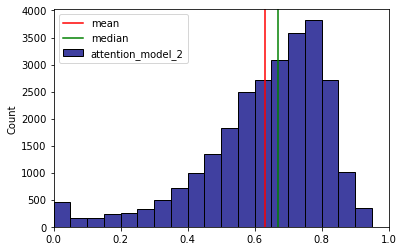

attention_model_2 has a mean IoU of 0.632
attention_model_2 has a median IoU of 0.670


In [140]:
combined_data = {}
for area in areas_of_interest:
    for m1 in models:
        if m1 not in combined_data.keys():
             combined_data[m1]= []
        combined_data[m1] += model_metrics[m1]['road_iou'][area] + model_metrics[m1]['building_iou'][area]
for m1 in models:
    sns.histplot(x=combined_data[m1], bins=np.arange(0, 1, 0.05), label=f'{m1}', color='navy', legend=m1)
    plt.xlim([0,1])
    plt.axvline(np.mean(combined_data[m1]), label='mean', c ='red')
    plt.axvline(np.median(combined_data[m1]), label='median', c='green')
    plt.legend()
    plt.show()
    print(f'{m1} has a mean IoU of {np.mean(combined_data[m1]):0.03f}')
    print(f'{m1} has a median IoU of {np.median(combined_data[m1]):0.03f}')

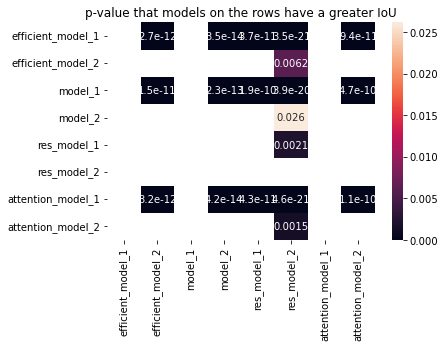

In [56]:
p_values = pd.DataFrame(index=models, columns=models, dtype=float)  

for m1, m2 in pairs:
    if m1 != m2:
        _, p_val = stats.ttest_ind(combined_data[m1], combined_data[m2], alternative ='greater')
        p_values.loc[m1, m2] = p_val
        p_values.loc[m2, m1] = 1 - p_val
    else:
        p_values.loc[m2, m1] = 1
plt.figure()
plt.title('p-value that models on the rows have a greater IoU')
sns.heatmap(p_values, mask = p_values > 0.1, annot=True)
plt.show()

While this is insightful, it doesn't account for the fact that we are doing multiple pair-wise p-value tests. 

We can fix this by calculating a fasle discovery rate corrected p-value:

In [208]:
from statsmodels.stats.multicomp import MultiComparison
input_data = []
input_group = []
for k in combined_data.keys():
    input_data += list(combined_data[k])
    input_group += [k for l in range(len(combined_data[k]))]
comp = MultiComparison(input_data, input_group)
tukey_hsd_results = comp.tukeyhsd()

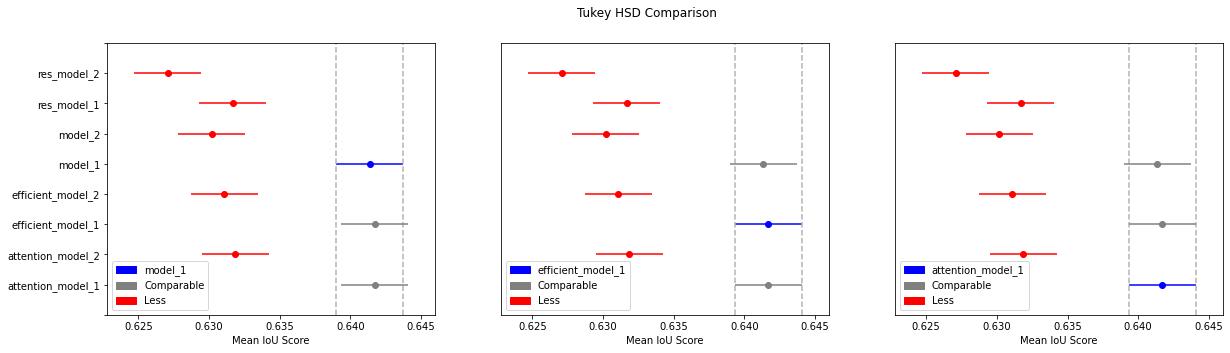

In [247]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1,3)
tukey_hsd_results.plot_simultaneous(comparison_name='model_1', ax=ax[0], xlabel='Mean IoU Score')
tukey_hsd_results.plot_simultaneous(comparison_name='efficient_model_1', ax=ax[1], xlabel='Mean IoU Score')
tukey_hsd_results.plot_simultaneous(comparison_name='attention_model_1', ax=ax[2], xlabel='Mean IoU Score', figsize=(20, 5))
ax[0].set_title('')
ax[1].set_title('')
ax[2].set_title('')
fig.suptitle("Tukey HSD Comparison")
ax[0].legend(handles=[Patch(facecolor='blue', edgecolor='blue',
                         label='model_1'), Patch(facecolor='grey', edgecolor='grey',
                         label='Comparable'), Patch(facecolor='red', edgecolor='red',
                         label='Less')], loc="best")
ax[1].legend(handles=[Patch(facecolor='blue', edgecolor='blue',
                         label='efficient_model_1'), Patch(facecolor='grey', edgecolor='grey',
                         label='Comparable'), Patch(facecolor='red', edgecolor='red',
                         label='Less')], loc="best")
ax[2].legend(handles=[Patch(facecolor='blue', edgecolor='blue',
                         label='attention_model_1'), Patch(facecolor='grey', edgecolor='grey',
                         label='Comparable'), Patch(facecolor='red', edgecolor='red',
                         label='Less')], loc="best")
ax[1].axes.get_yaxis().set_visible(False)
ax[2].axes.get_yaxis().set_visible(False)
plt.show()

The main difference between models that have a suffix model_1 and model_2 are that choice of loss function. 
What we are seeing that the dice loss performs better than the categorical cross entropy for providing a higher IoU on average per an image.

However, when using the dice loss function we do not find statistically significant evidence that the average IoU per image is better between the models, except for the residual UNet model.